### Exploring Credit Risks

This activity is another open exploration of a dataset using both cleaning methods and visualizations.  The data describes customers as good or bad credit risks based on a small set of features specified below.  Your task is to create a Jupyter notebook with an exploration of the data using both your `pandas` cleaning and analysis skills and your visualization skills using `matplotlib`, `seaborn`, and `plotly`.  Your final notebook should be formatted with appropriate headers and markdown cells with written explanations for the code that follows. 

Post your notebook file in Canvas, as well as a brief (3-4 sentence) description of what you found through your analysis. Respond to your peers with reflections on thier analysis. 

-----


##### Data Description

```
1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)
```

In [68]:
import pandas as pd

In [70]:
df = pd.read_csv('data/dataset_31_credit-g.csv')

In [72]:
print(df.shape)
df.head(3)

(1000, 21)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

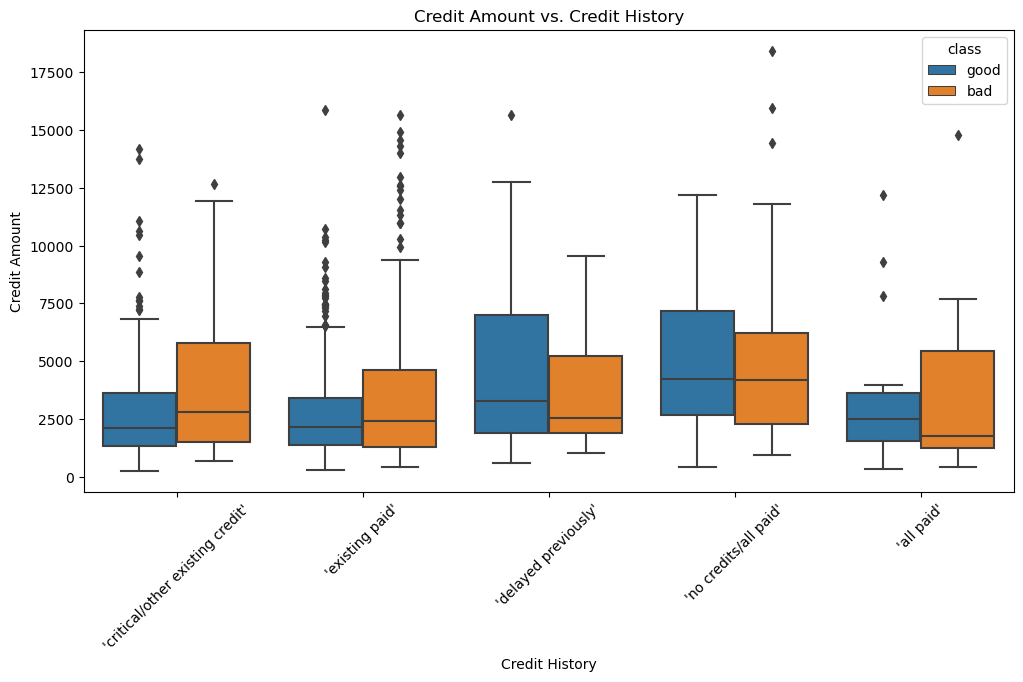

In [78]:
# Plot Credit History vs Credit Amount
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='credit_history', y='credit_amount', hue='class')
plt.title('Credit Amount vs. Credit History')
plt.xlabel('Credit History')
plt.ylabel('Credit Amount')
plt.xticks(rotation=45)

plt.savefig('./images/credit_history.png')
plt.show()

#### Credit Amount vs. Credit History
**Class Comparison**:
   - In categories like 'existing paid' and 'critical/other existing credit', individuals in the "bad" class tend to have higher credit amounts than those in the "good" class. This trend suggests that higher credit amounts might be associated with a higher risk of being classified as "bad".

**Credit Amount Distribution**:
   - For individuals with 'no credits/all paid' and 'delayed previously' credit histories, the credit amount distribution is more balanced between the "good" and "bad" classes. This balance indicates that these credit history categories do not significantly differentiate between the "good" and "bad" classes based on credit amounts.

In [80]:
#Create a gender column by doing some munging on the personal status column
df['gender'] = df['personal_status'].apply(lambda x: 'female' if 'female' in x else 'male' if 'male' in x else None)
print(df['gender'].value_counts())

gender
male      690
female    310
Name: count, dtype: int64


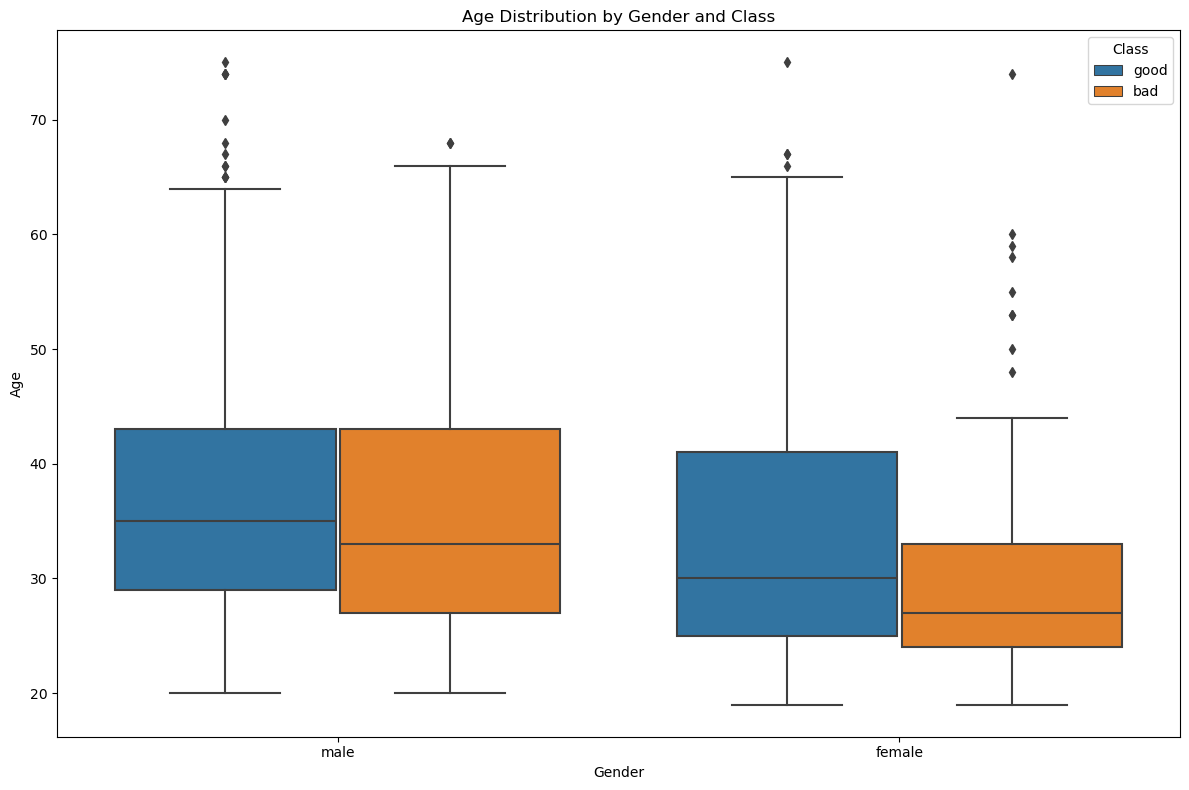

In [88]:
# Plot Age and Gender vs Class
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='gender', y='age', hue='class')
plt.title('Age Distribution by Gender and Class')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Class')
plt.tight_layout()

plt.savefig('./images/age_and_gender.png')
plt.show()

#### Age Distribution by Gender and Class
**Male vs. Female Age Distribution**:
   - The median age for both males and females in the "good" class is slightly higher than in the "bad" class.
   - There is a wider age range for males in both classes compared to females.
   - Females in the "bad" class tend to be younger, with a smaller interquartile range compared to males.
   - The "good" class has a higher median age for both genders compared to the "bad" class, indicating that older individuals are more likely to fall into the "good" credit category.
   - The age distribution for males in the "good" class is more spread out, suggesting greater age diversity among males with good credit.

In [84]:
#Create a checking_savings column by doing some munging on the checking_status and savings_status columns
df['checking_savings'] = df['checking_status'] + ' & ' + df['savings_status']
print(df['checking_savings'].value_counts())

checking_savings
'<0' & '<100'                         219
'no checking' & '<100'                191
'0<=X<200' & '<100'                   152
'no checking' & 'no known savings'     99
'0<=X<200' & '100<=X<500'              47
'0<=X<200' & 'no known savings'        45
'>=200' & '<100'                       41
'no checking' & '500<=X<1000'          40
'no checking' & '100<=X<500'           39
'<0' & 'no known savings'              29
'no checking' & '>=1000'               25
'0<=X<200' & '>=1000'                  14
'<0' & '100<=X<500'                    12
'0<=X<200' & '500<=X<1000'             11
'>=200' & 'no known savings'           10
'<0' & '500<=X<1000'                    8
'<0' & '>=1000'                         6
'>=200' & '100<=X<500'                  5
'>=200' & '500<=X<1000'                 4
'>=200' & '>=1000'                      3
Name: count, dtype: int64


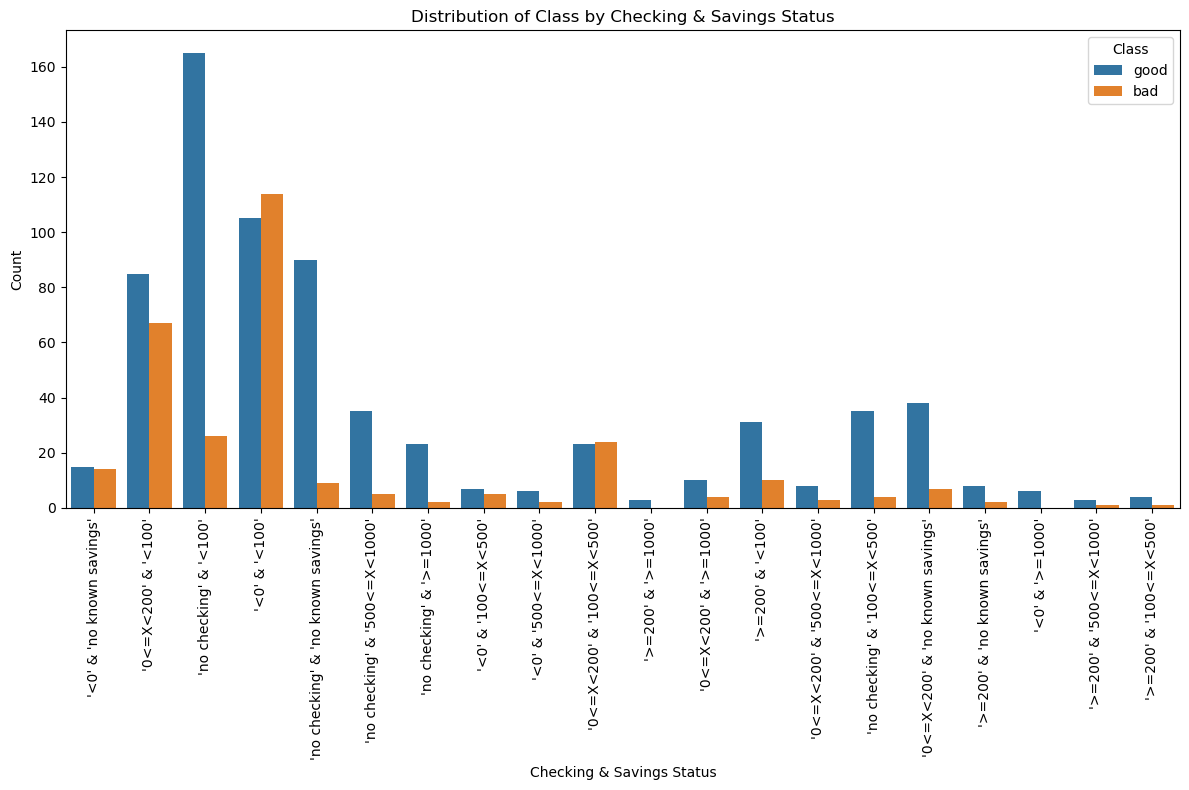

In [86]:
# Plot the 'checking_savings' column against the 'class' column
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='checking_savings', hue='class')
plt.xticks(rotation=90)
plt.title('Distribution of Class by Checking & Savings Status')
plt.xlabel('Checking & Savings Status')
plt.ylabel('Count')
plt.legend(title='Class')
plt.tight_layout()

plt.savefig('./images/checking_and_savings.png')
plt.show()

#### Distribution of Class by Checking & Savings Status
**Common Checking & Savings Status**:
   - The most common checking and savings status combination for individuals in the "good" class is 'no checking' & 'less than 100 savings'.
   - The second most common combination is 'negative checking' & 'no known savings', followed by 'less than 200 in checking' & 'less than 100 in savings'.

**Class Comparison**:
   - For many checking and savings status combinations, the "good" class has a higher count compared to the "bad" class signifying that more people are approved than those who are denied in aggregate.
   - Some combinations such as '<0' & '100<=X<500' and 'no checking' & '500<=X<1000' show a noticeable difference where "good" class counts are significantly higher.

**Less Common Combinations**:
   - Combinations like '>=200' & '>=1000' and '>=200' & '100<=X<500' have very few individuals, but those that are present tend to fall into the "good" class signifying that stable checking and savings account balances, while rare, do impact credit decisioning.
